In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model


In [4]:
data=pd.read_csv("train.csv")

In [5]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


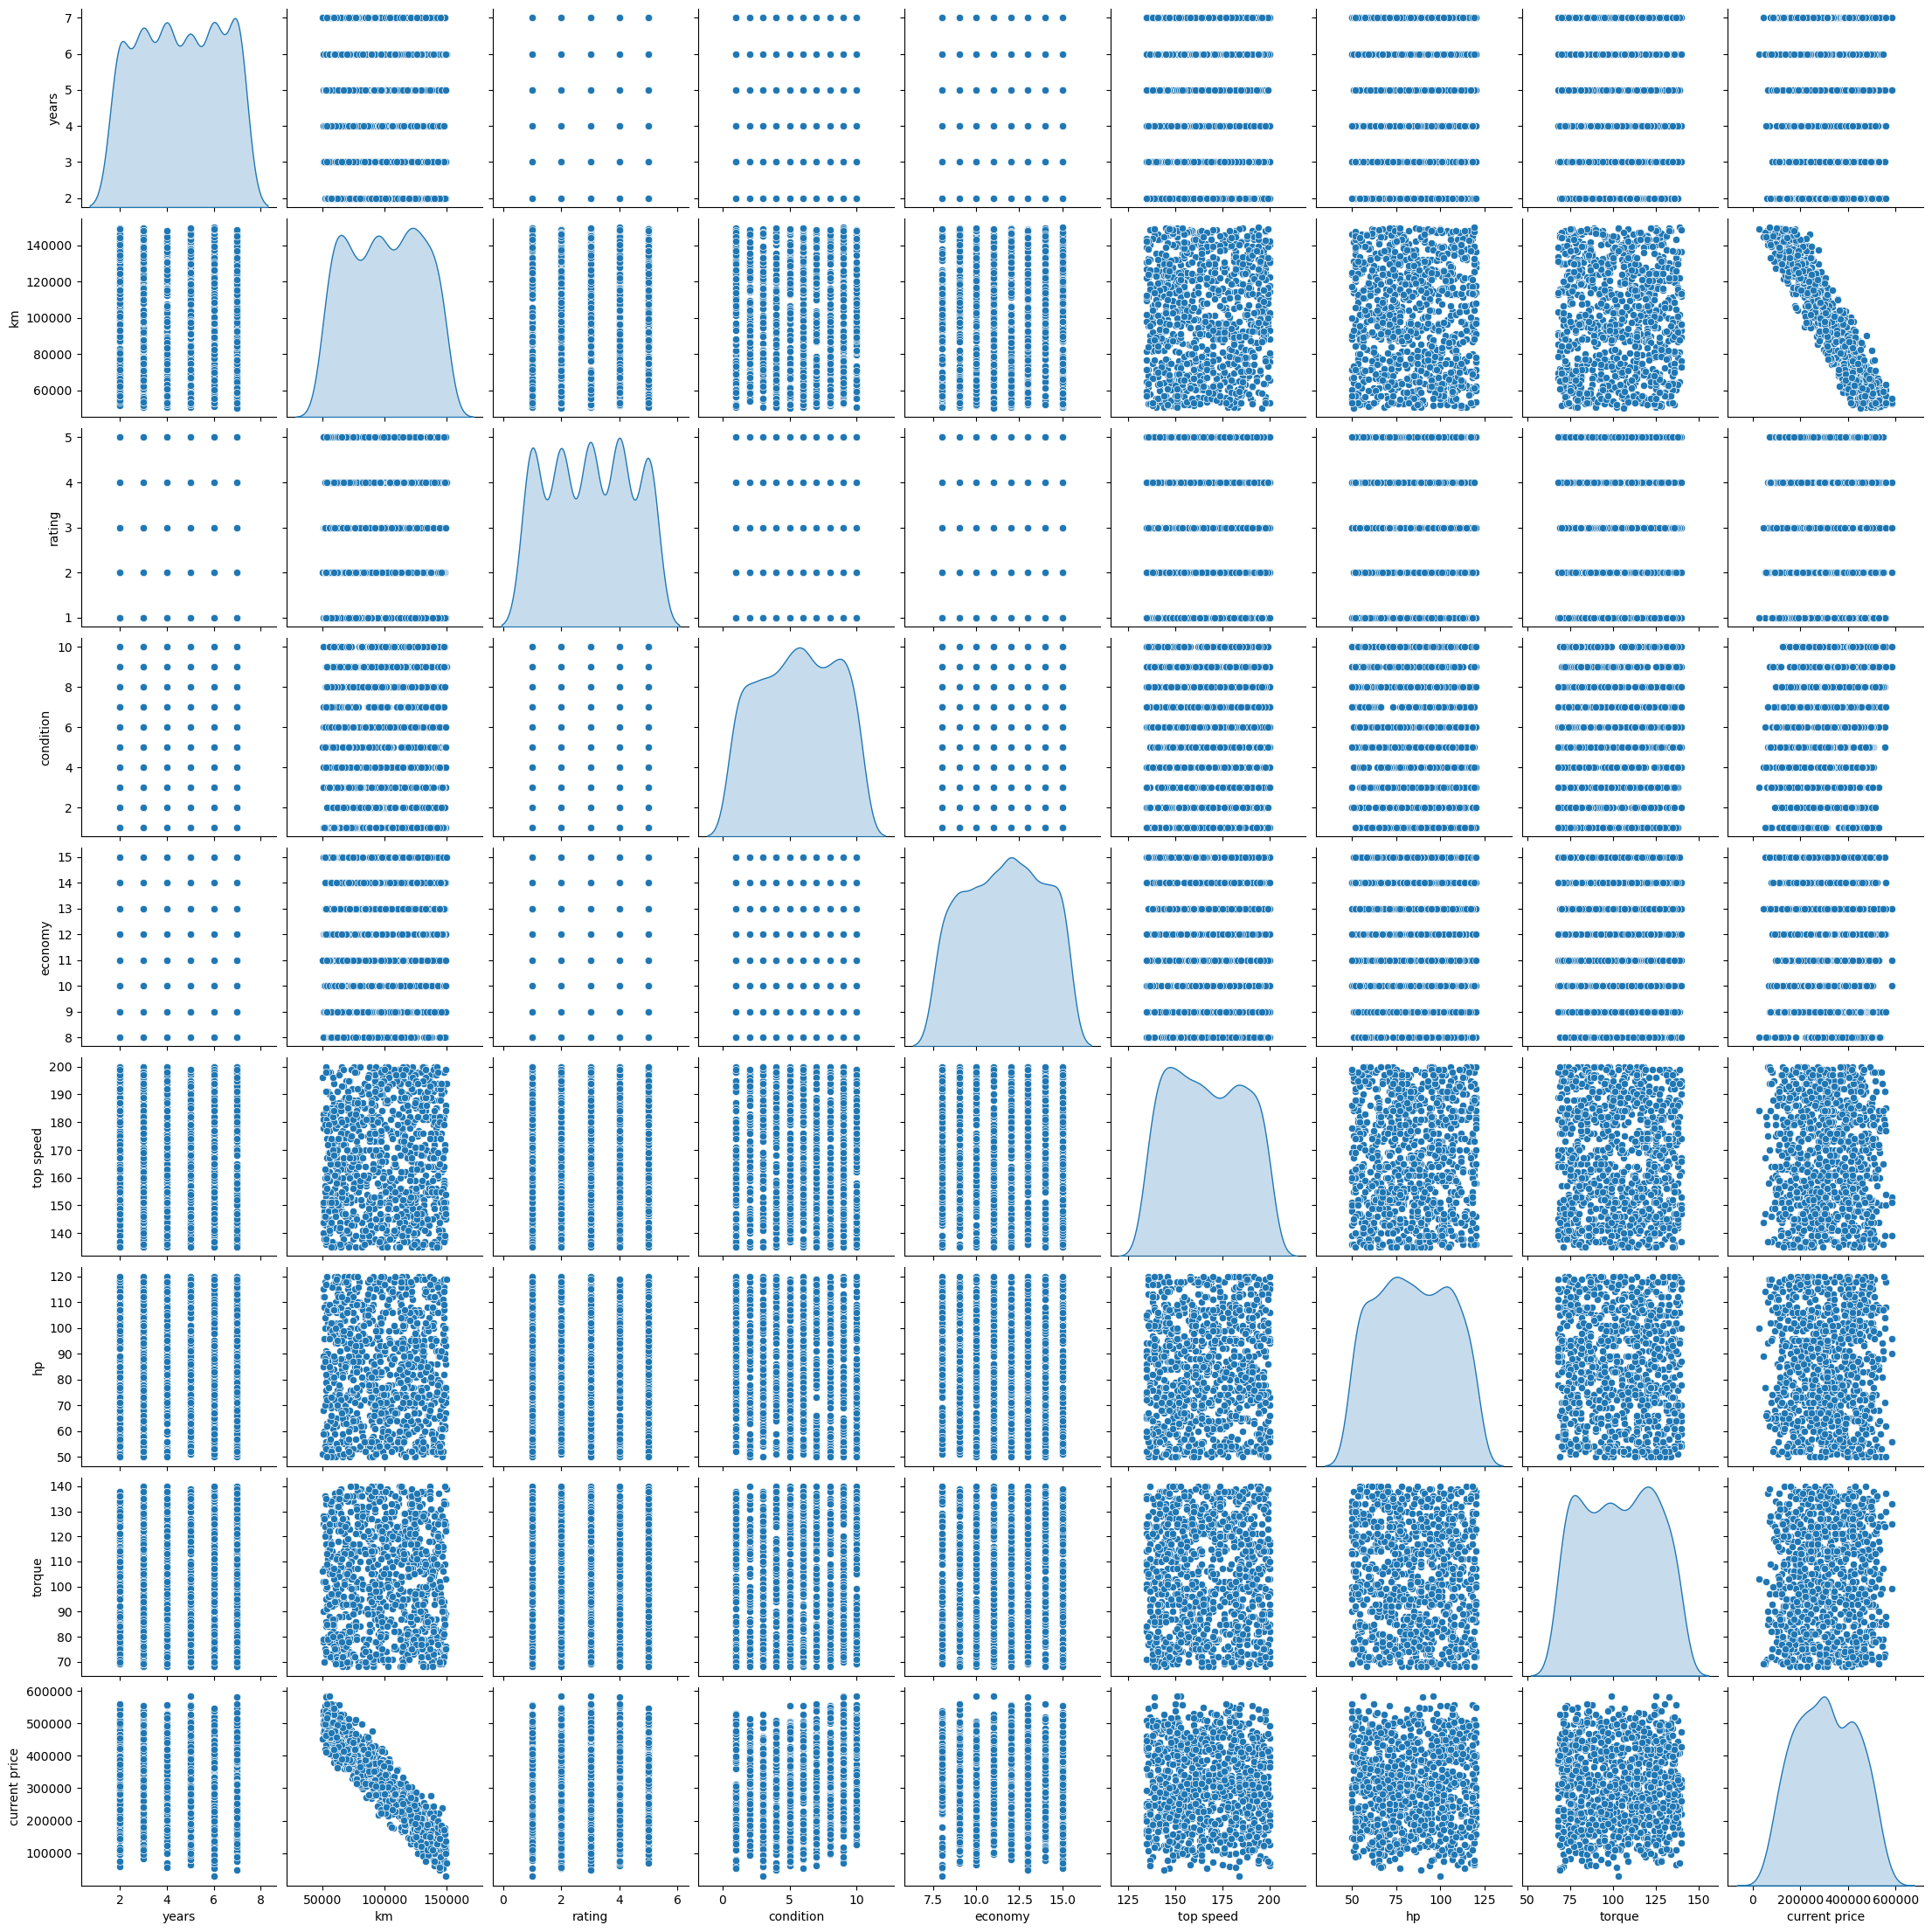

In [15]:
sns.pairplot(data[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],diag_kind="kde")
plt.show()

In [6]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data,tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [7]:
#tensor_data=tf.random.shuffle(tensor_data)

In [8]:
X=tensor_data[:,3:-1]

In [9]:
Y=tensor_data[:,-1]
Y=tf.expand_dims(Y,axis=-1)

In [10]:
normalizer=Normalization()
normalizer.adapt(X)

## neural network mode


In [11]:
model=keras.Sequential([
    layers.InputLayer(input_shape=(8)),
    normalizer,
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(8,activation="relu"),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                        

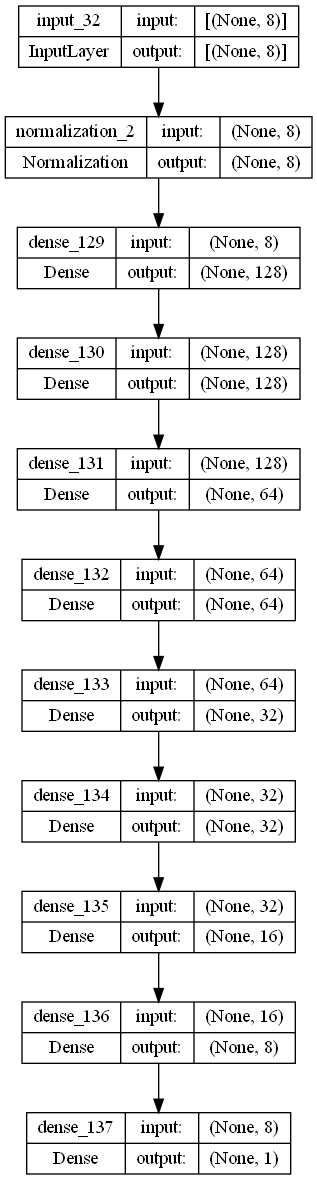

In [411]:
plot_model(model,to_file="model.png",show_shapes=True)

In [412]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model with mean absolute error loss, custom Adam optimizer, and RMSE metric
model.compile(loss='mean_absolute_error', optimizer=adam_optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [413]:
#history=model.fit(X,Y,epochs=1000,batch_size=32,verbose=1)

In [414]:
#plt.plot(history.history["root_mean_squared_error"])

In [415]:
#model.evaluate(X,Y)

In [416]:
import numpy as np

# Assuming you have your data in X and Y arrays

# Calculate the number of samples for each set
total_samples = len(X)
num_train = int(0.8 * total_samples)
num_val = int(0.1 * total_samples)
num_test = total_samples - num_train - num_val



X_train, Y_train = X[0:num_train,:], Y[0:num_train,:]
X_val, Y_val = X[num_train:num_train+num_val,:], Y[num_train:num_train+num_val,:]
X_test, Y_test = X[num_train+num_val: ,:], Y[num_train+num_val: ,:]


In [417]:
X_val.shape

TensorShape([100, 8])

In [418]:
history1 = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))


Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 201186.0156 - root_mean_squared_error: 242100.6250 - val_loss: 155263.4844 - val_root_mean_squared_error: 190653.6094
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 179003.0625 - root_mean_squared_error: 215848.3594 - val_loss: 155020.5156 - val_root_mean_squared_error: 190297.7500
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 180936.0000 - root_mean_squared_error: 216199.1562 - val_loss: 176422.9375 - val_root_mean_squared_error: 200653.2031
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 177666.5625 - root_mean_squared_error: 211912.8750 - val_loss: 159136.4219 - val_root_mean_squared_error: 198268.6406
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 177624.4062 - root_mean_squared_error: 212443.8594 - val_loss: 154738.7812 - val_root_mean_squared_error: 186029.7031
Epoch 6/100
25/25 [==========================

25/25 [==============================] - 0s 2ms/step - loss: 62296.8008 - root_mean_squared_error: 77270.0781 - val_loss: 60755.5352 - val_root_mean_squared_error: 75786.4766
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 71552.8438 - root_mean_squared_error: 88959.5938 - val_loss: 68882.5781 - val_root_mean_squared_error: 83422.6484
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 66402.0625 - root_mean_squared_error: 82568.5938 - val_loss: 64761.3047 - val_root_mean_squared_error: 82005.0312
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 63577.1602 - root_mean_squared_error: 79014.4219 - val_loss: 107486.9922 - val_root_mean_squared_error: 129089.4141
Epoch 91/100
25/25 [==============================] - 0s 3ms/step - loss: 67335.7188 - root_mean_squared_error: 84586.5156 - val_loss: 62808.8203 - val_root_mean_squared_error: 79164.6484
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - los

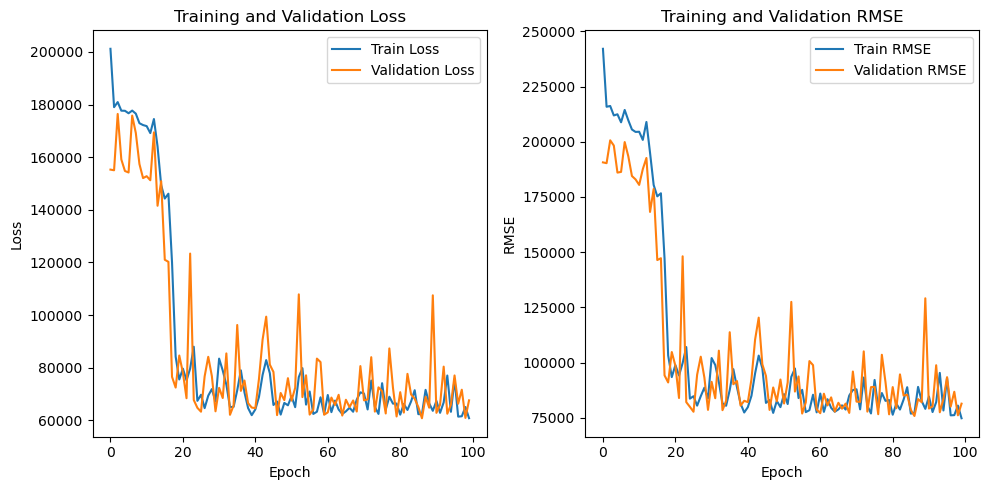

In [419]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation RMSE
plt.subplot(1, 2, 2)
plt.plot(history1.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history1.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [420]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 66964.5078 - root_mean_squared_error: 80347.0391


[66964.5078125, 80347.0390625]

In [421]:
model.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 62138.8008 - root_mean_squared_error: 76077.5547


[62138.80078125, 76077.5546875]

In [394]:
model.predict(X_test[10])

1/1 [==============================] - 0s 64ms/step


array([[436912.06]], dtype=float32)

In [395]:
Y_test[10]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([473834.], dtype=float32)>

In [396]:
X_test[10]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([7.0000e+00, 5.8644e+04, 3.0000e+00, 5.0000e+00, 1.0000e+01,
       1.7000e+02, 1.0700e+02, 8.0000e+01], dtype=float32)>

In [397]:
index=np.arange(1,101)
tensor_1d = tf.reshape(Y_test, [-1])
tensorpre_1d = tf.reshape(model.predict(X_test), [-1])

4/4 [==============================] - 0s 3ms/step


<BarContainer object of 100 artists>

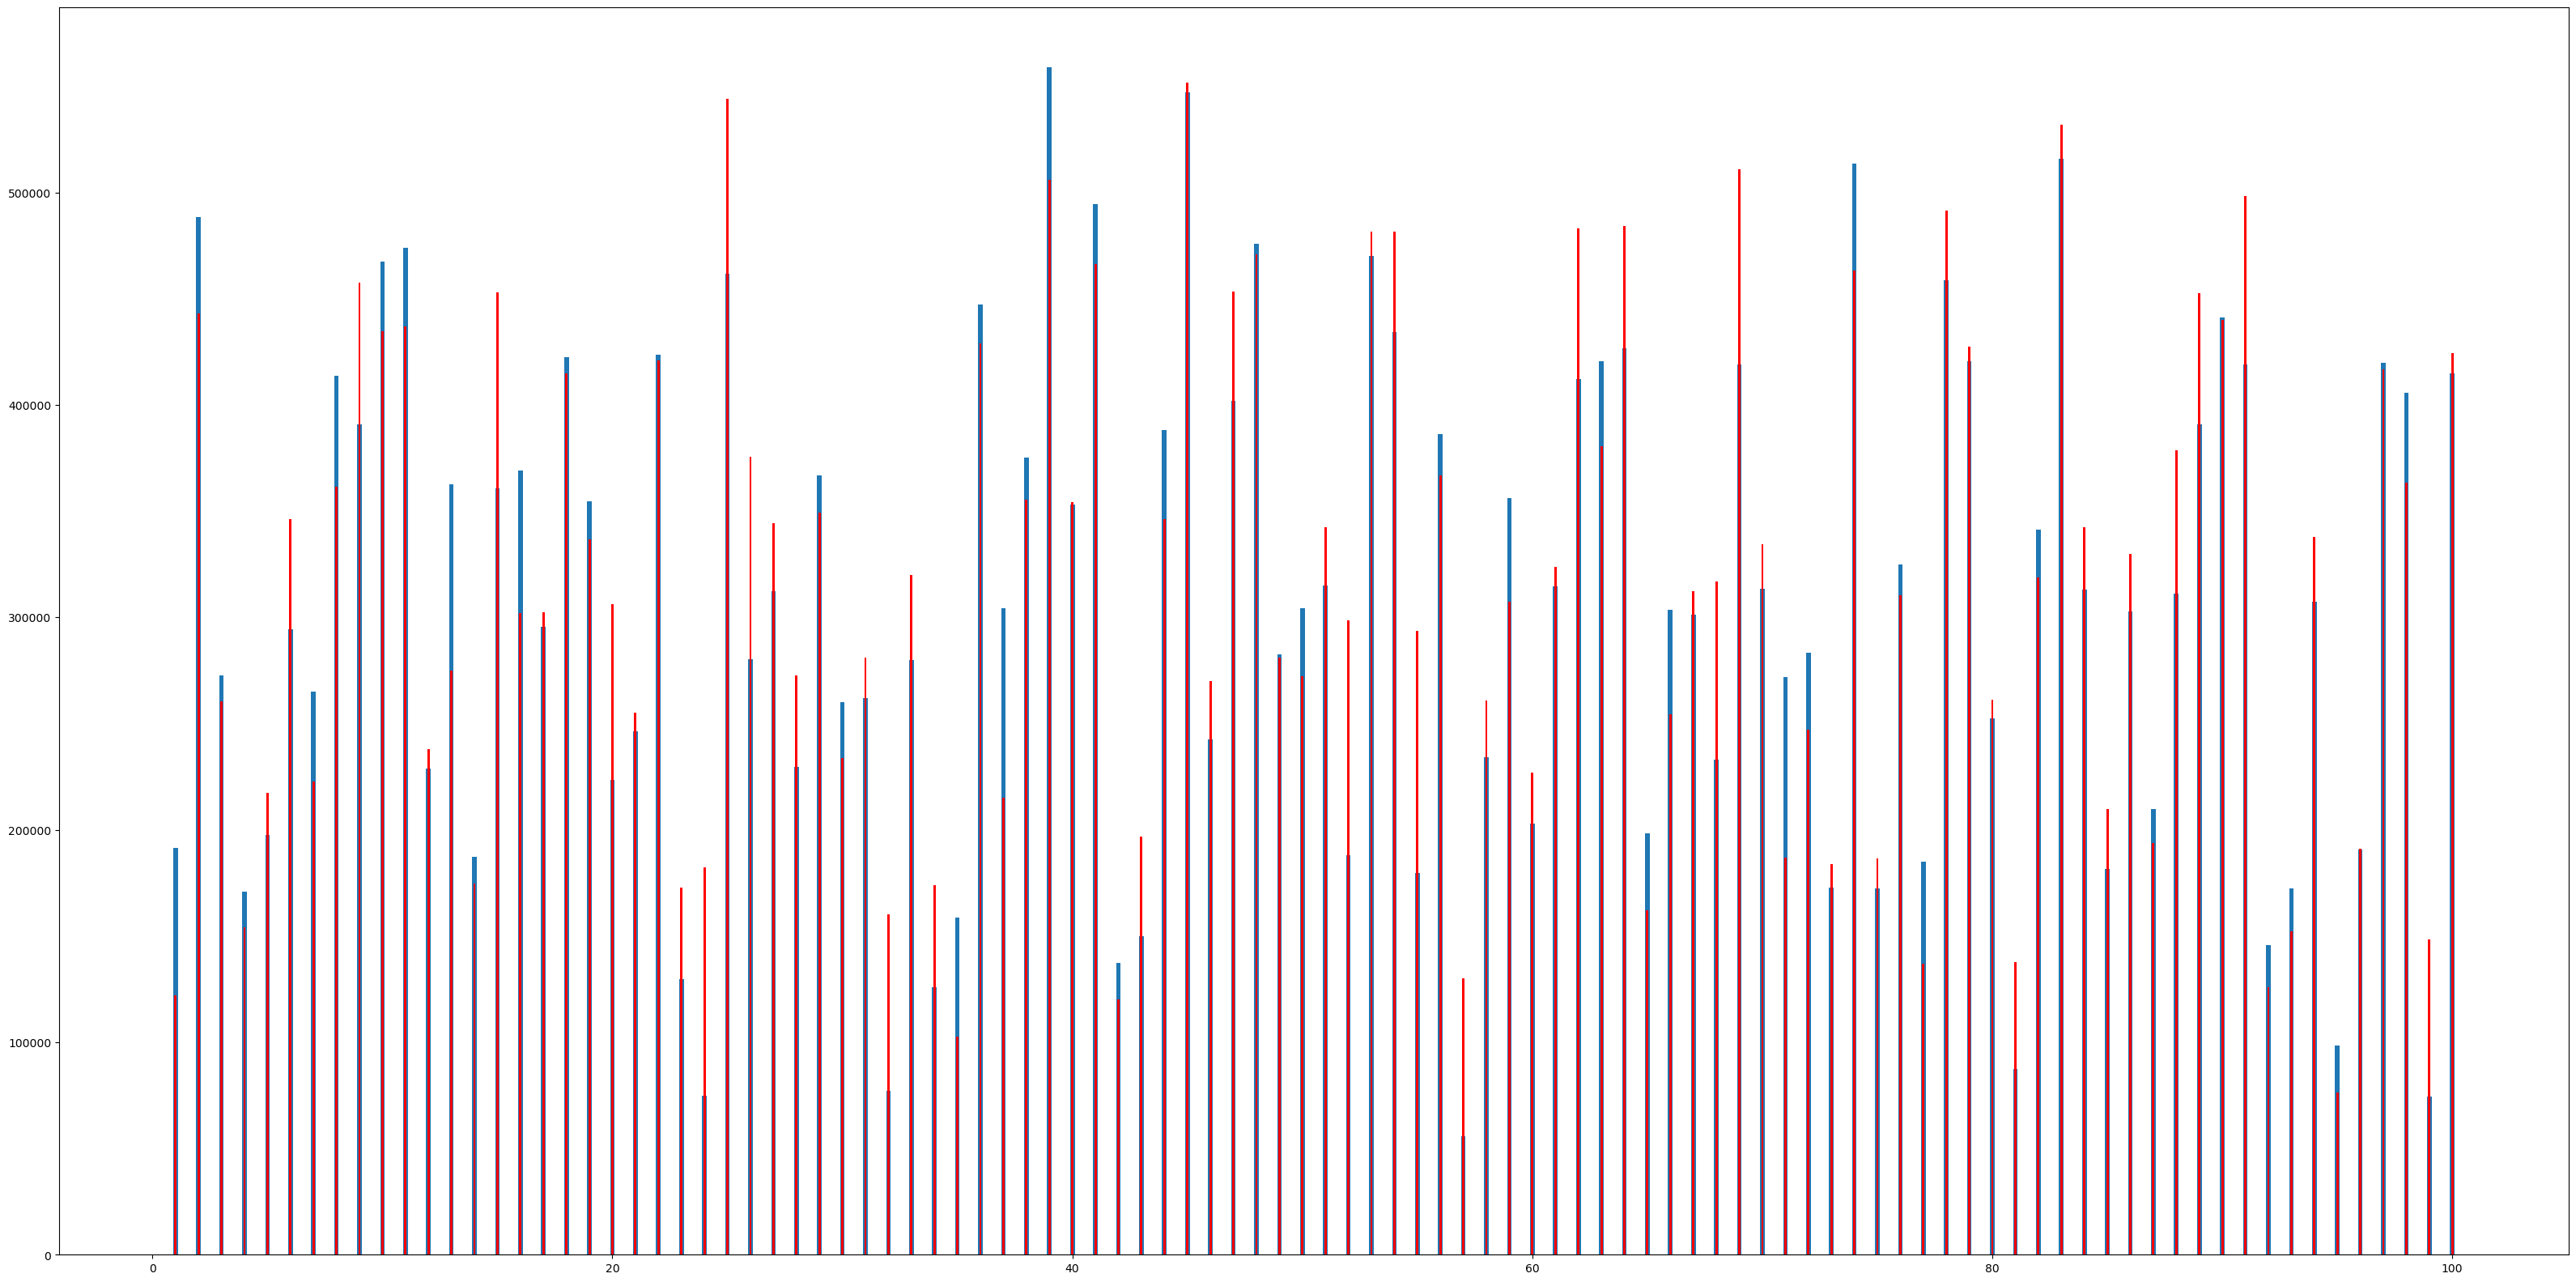

In [398]:
plt.figure(figsize=(40,20))
plt.bar(index,tensor_1d,width=0.2)
plt.bar(index,tensorpre_1d,width=0.1,color="red")

In [113]:
tensor_2d = np.array([[1, 2, 3],
                      [4, 5, 6]])

# Reshape the 2D tensor to a 1D tensor
tensor_1d = tensor_2d.reshape(-1)

In [114]:
tensor_1d

array([1, 2, 3, 4, 5, 6])